<a href="https://colab.research.google.com/github/parasgupta1995/Almabetter-Capstone-project/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Telecom chrun and Region based Division of US state dataframe

df=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Telecom Churn.csv')

In [4]:
#Total call minutes within each customer 

df['calls minutes']=df.apply(lambda x: x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes'],axis=1)

In [5]:
#Total call minutes within each customer 

df['Total revenue']=df.apply(lambda x: x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'],axis=1)

In [6]:
#Number of calls by Customer in total

df['number of calls']=df.apply(lambda x:x['Total day calls']+x['Total eve calls']+x['Total night calls']+x['Total intl calls']+x['Customer service calls'],axis=1)

In [7]:
#Sorting values by State in Dataframes

df.sort_values(by='State',inplace=True,ignore_index=True)

In [8]:
#dataframe of selected useful data only for calculating number of calls

Number_of_calls_dataframe=df.loc[:,['State', 'Account length', 'International plan', 'Voice mail plan','Number vmail messages', 'Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']]

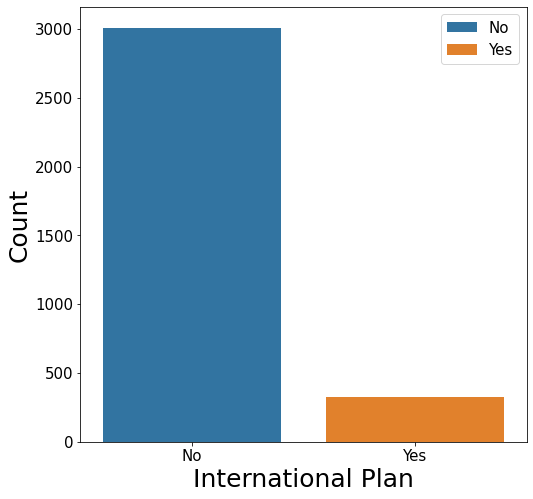

In [9]:
#People with no international plan and still making international calls can be potential customer for International plan

no_intl_plan_making_intlcalls=Number_of_calls_dataframe.groupby(by='International plan')['State'].count().reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x='International plan',y='State',data=no_intl_plan_making_intlcalls,hue='International plan',dodge=False)
plt.xlabel("International Plan",size=25)
plt.xticks(size=15)
plt.ylabel("Count",size=25)
plt.yticks(size=15)
plt.legend(fontsize=15)

In [10]:
#Total number of call in each State

data_group=df.groupby('State').sum()[['Total day calls','Total eve calls','Total night calls']]


In [11]:
# State with Maximum and Minimum number of call 

for j in data_group.columns:
  max_state=data_group.index[data_group[j]==data_group[j].max()].tolist()
  min_state=data_group.index[data_group[j]==data_group[j].min()].tolist()
  max_val=data_group[j].max()
  min_val=data_group[j].min()
  print(f'{max_state[0]} state has maximum number of {j},i.e. {max_val}')
  print(f'{min_state[0]} state has minimum number of {j},i.e. {min_val}')
   

WV state has maximum number of Total day calls,i.e. 11001
CA state has minimum number of Total day calls,i.e. 3553
WV state has maximum number of Total eve calls,i.e. 10394
CA state has minimum number of Total eve calls,i.e. 3505
WV state has maximum number of Total night calls,i.e. 10660
CA state has minimum number of Total night calls,i.e. 3373


In [12]:
#Grouped Data(by="State") number of calls made based on day,evening, night, international,service support 

number_of_call_timewise=Number_of_calls_dataframe.groupby(by='State').sum()[['Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']].sort_values(by='State').reset_index()

In [13]:
#Call number based on Region 

calls_Statewise=number_of_call_timewise.set_index('State')

In [14]:
#Total number of day,evening,night,International,service calls Regionwise

Total_number_of_calls=calls_Statewise.groupby(by='State').sum()
Total_number_of_calls.reset_index(inplace=True)
Total_number_of_calls.sort_values(by='Customer service calls',inplace=True)

In [15]:
size_of=(Total_number_of_calls.shape)

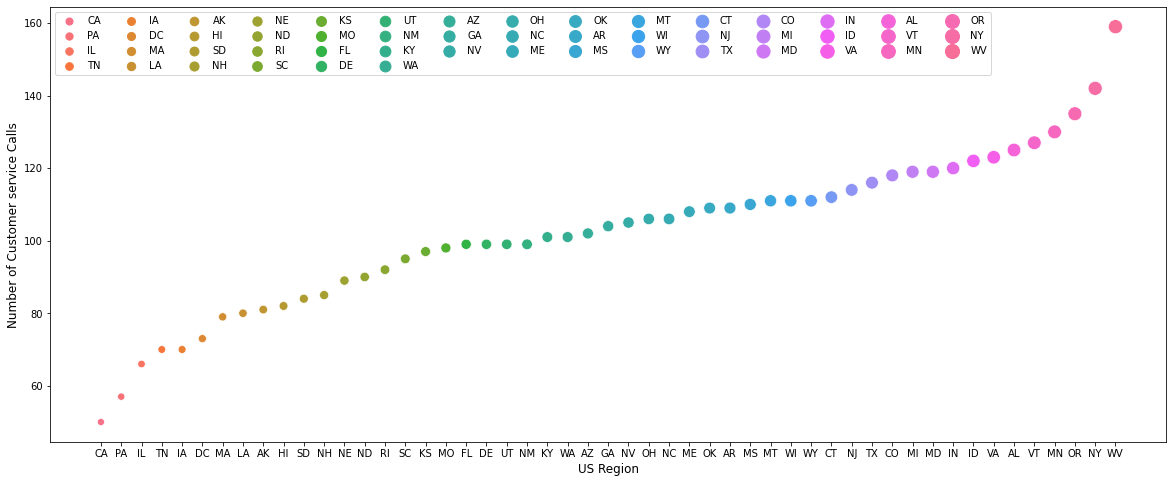

In [16]:
plt.rcParams['figure.figsize']=(20,8)
data1=Total_number_of_calls[['State','Customer service calls']]
sns.scatterplot(x='State',y='Customer service calls',data=data1,hue='State',size='State',sizes=(200,50))
plt.xlabel('US Region',fontsize=12)
plt.ylabel('Number of Customer service Calls',fontsize=12)
plt.legend(ncol=15,fontsize=10)

In [17]:
#List of State

state_list=list(df['State'].sort_values().unique())
print(state_list)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [18]:
#Dataframe of deactivated account id

data_for_stop_id=df[df['Churn']==True][['State','Account length','Area code','Customer service calls','Churn']].groupby(by='State')


In [19]:
#list of number of stop using service statewise

list_Account_id_stop=[]

for i in state_list:
  a=list(data_for_stop_id.get_group(i)['Account length'])
  list_Account_id_stop.append(a)
dictionary_state_stop_id=dict(zip(state_list,list_Account_id_stop))
print(dictionary_state_stop_id)

{'AK': [126, 111, 177], 'AL': [197, 55, 93, 86, 60, 89, 172, 25], 'AR': [118, 115, 127, 54, 76, 107, 145, 99, 109, 98, 113], 'AZ': [66, 113, 109, 12], 'CA': [84, 112, 151, 103, 111, 37, 138, 79, 105], 'CO': [130, 159, 121, 105, 154, 121, 92, 132, 77], 'CT': [120, 119, 77, 125, 56, 93, 23, 87, 115, 160, 64, 96], 'DC': [114, 82, 60, 24, 66], 'DE': [113, 129, 224, 2, 122, 67, 138, 97, 51], 'FL': [55, 166, 127, 144, 100, 105, 132, 70], 'GA': [76, 93, 132, 44, 89, 117, 128, 122], 'HI': [105, 99, 108], 'IA': [81, 40, 44], 'ID': [130, 78, 103, 82, 77, 193, 119, 116, 92], 'IL': [89, 68, 78, 71, 137], 'IN': [117, 65, 94, 115, 122, 129, 68, 113, 72], 'KS': [167, 110, 24, 126, 46, 91, 47, 170, 84, 92, 105, 110, 94], 'KY': [98, 21, 39, 113, 58, 74, 91, 75], 'LA': [150, 124, 109, 155], 'MA': [40, 111, 127, 98, 119, 17, 71, 88, 62, 34, 136], 'MD': [135, 76, 61, 111, 93, 108, 136, 133, 119, 172, 154, 62, 93, 116, 88, 107, 147], 'ME': [62, 100, 75, 23, 92, 88, 80, 36, 97, 102, 118, 56, 131], 'MI': [22

In [20]:
#Number of Customer in each State

number_of_customer_each_state=df[['State']].value_counts().reset_index()
number_of_customer_each_state.rename(columns={0: "Number of customer"},inplace=True)

In [21]:
#Sort the dataframe of number of customer

number_of_customer_each_state.sort_values(by='State',inplace=True)

In [22]:
#Extraction of number chrun customer statewise list:

number_of_churn_statewise=[]
for i in list(df['State'].unique()):
  n=len(dictionary_state_stop_id.get(i))
  number_of_churn_statewise.append(n)
print(number_of_churn_statewise)

[3, 8, 11, 4, 9, 9, 12, 5, 9, 8, 8, 3, 3, 9, 5, 9, 13, 8, 4, 11, 17, 13, 16, 15, 7, 14, 14, 11, 6, 5, 9, 18, 6, 14, 15, 10, 9, 11, 8, 6, 14, 8, 5, 18, 10, 5, 8, 14, 7, 10, 9]


In [23]:
#Creating a dictionary for pandas dataframe of churn customer statewise

dataframe_churn = {"State":state_list, "Number of Churn": number_of_churn_statewise}

In [24]:
#churn customer dataframe

churn_data_statewise=pd.DataFrame(dataframe_churn)

In [25]:
#dataframe of number of customer and churn customer in a State

comparision_data_for_chrun=number_of_customer_each_state.set_index('State').join(churn_data_statewise.set_index('State'))

In [26]:
#index reseting

comparision_data_for_chrun.reset_index(level=0,inplace=True)
comparision_data_for_chrun.head()

,State,Number of customer,Number of Churn
0,AK,52,3
1,AL,80,8
2,AR,55,11
3,AZ,64,4
4,CA,34,9


In [27]:
# Joining comparision dataframe with df2 to get Region in the dataframe

comparision_data_for_chrun=comparision_data_for_chrun.sort_values(by='Number of Churn')

In [28]:
# Percentage retention of the Customer in each State

comparision_data_for_chrun['retention percent']=comparision_data_for_chrun.apply(lambda x:(1-x['Number of Churn']/x['Number of customer'])*100,axis=1)
comparision_data_for_chrun.sort_values(by='retention percent',inplace=True)

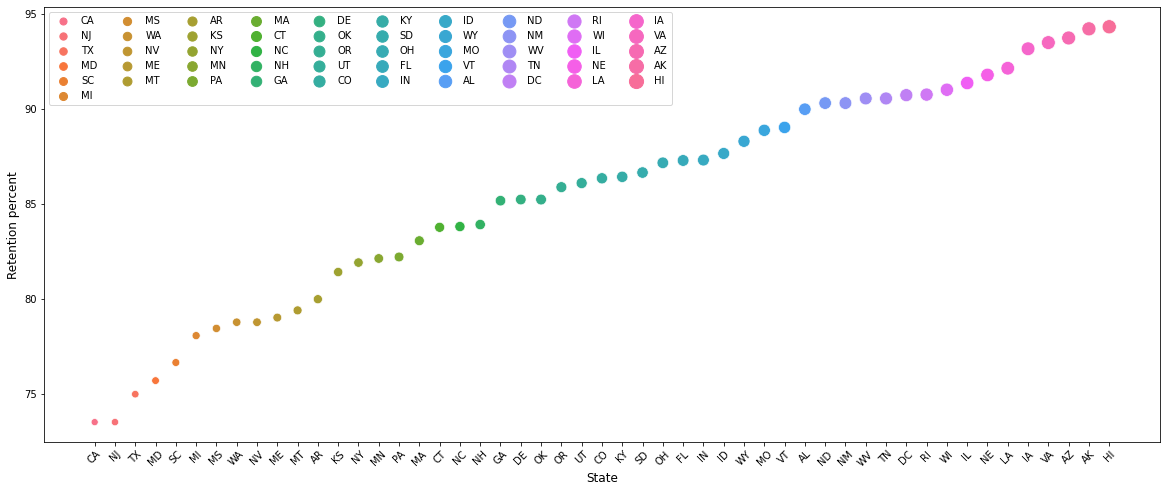

In [29]:
#Customer Retention Plot for each State

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='retention percent',data=comparision_data_for_chrun,hue='State',size='State',sizes=(200,50))
plt.xticks(rotation=45)
plt.xlabel(f"State",size=12)
plt.ylabel("Retention percent",size=12)
plt.legend(ncol=10)

In [30]:
def charge_per_minute(arg1,arg2):
  '''Function to calculate the Charge per minute, where arg1 reperesent Charge and arg2 represent time '''
  if arg1==0 and arg2==0:
    minute_charge=int(0)
    return minute_charge
  else:
    minute_charge=arg1/arg2
    return minute_charge


In [31]:
#Average Price per minutes for day,eve,night,international calls

df['day charge per minute']=df.apply(lambda x: charge_per_minute(x['Total day charge'],x['Total day minutes']),axis=1)
df['eve charge per minute']=df.apply(lambda x: charge_per_minute(x['Total eve charge'],x['Total eve minutes']),axis=1)
df['night charge per minute']=df.apply(lambda x: charge_per_minute(x['Total night charge'],x['Total night minutes']),axis=1)
df['intl charge per minute']=df.apply(lambda x: charge_per_minute(x['Total intl charge'],x['Total intl minutes']),axis=1)

In [32]:
#Mean price per minutes across the Statewise 

series_mean_price=df.groupby(by="State")[['day charge per minute','eve charge per minute','night charge per minute','intl charge per minute']].mean()

In [33]:
#Extraction of data when customer has a voice mail plan from given dataframe and grouping them together by Area code and State

data=df[df['Voice mail plan']=='Yes'][['State','Area code','Number vmail messages','Churn']].set_index('State')
grouped_data=data.groupby(by=['Area code','State'])['Number vmail messages',"Churn"].mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


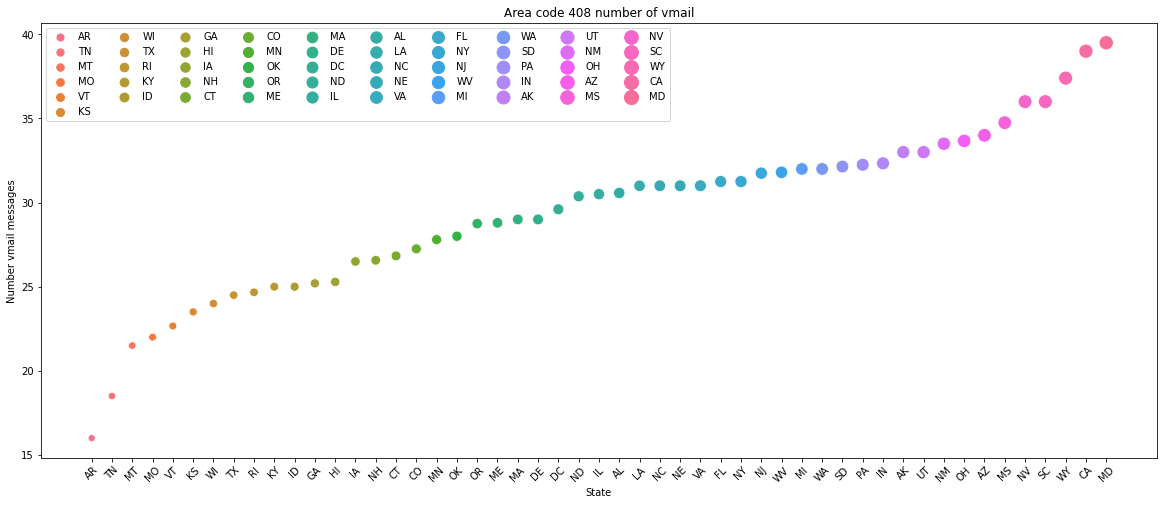

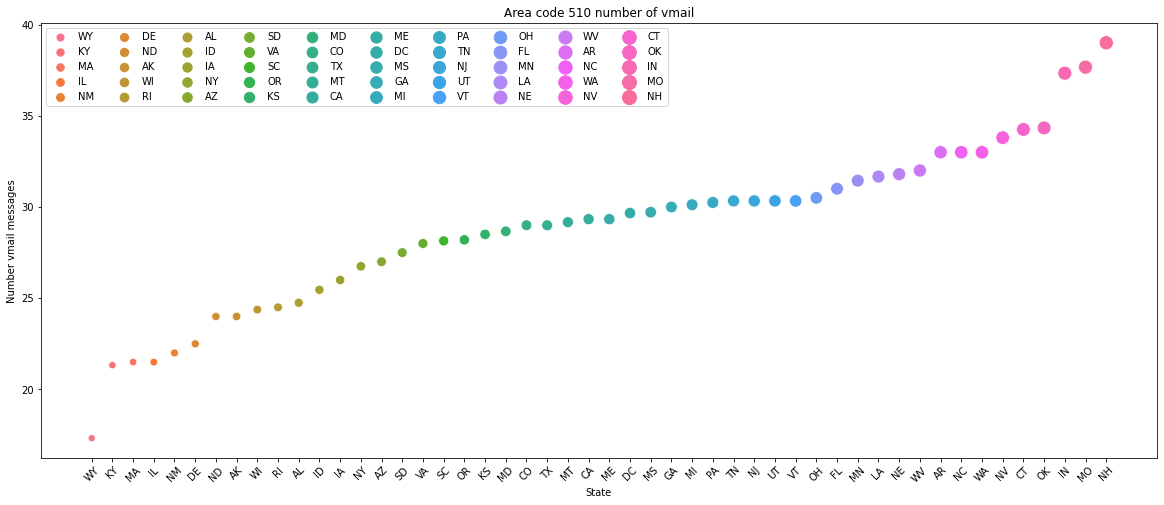

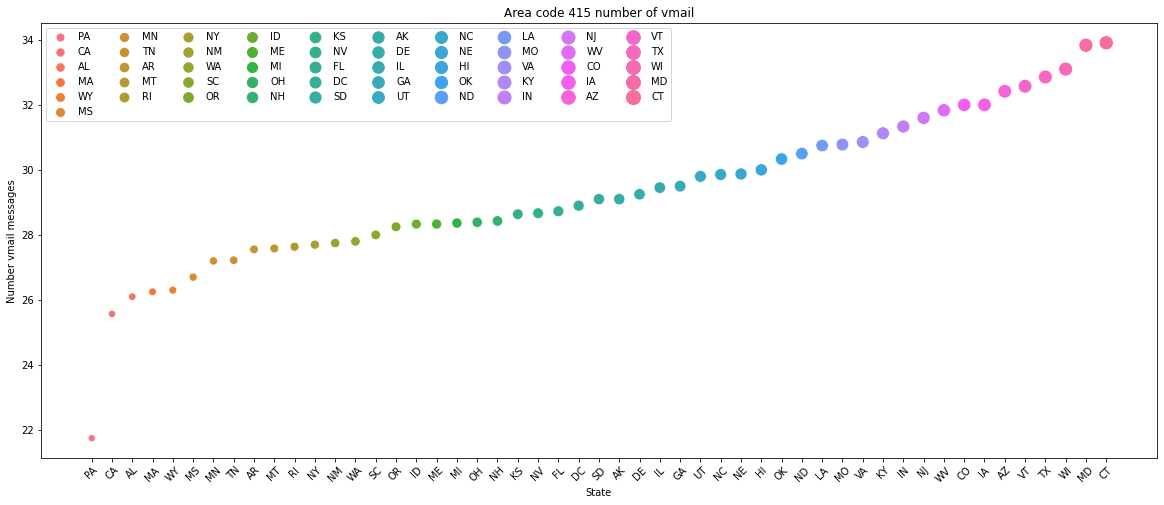

In [34]:
# Plot Total number vmail message for each Area code in the state.3 Subplot plotted using 'for' loop 

for i in [408, 510, 415]:
  pivoted_data=grouped_data.loc[i,:].sort_values("Number vmail messages")
  plt.figure(figsize=(20,8))
  sns.scatterplot(x="State", y='Number vmail messages',hue='State',data=pivoted_data,size='State',sizes=(200,50))
  plt.legend(bbox_to_anchor=(1,1))
  plt.title(f'Area code {i} number of vmail')
  plt.xticks(rotation=45)
  plt.legend(ncol=10)

In [35]:
#Data Extracted for the calculation of average of Account length,State,Number vmail messages,day charge per minute,eve charge per minute,night charge per minute,intl charge per minute, calls minutes, Total revenue, number of calls

data_for_mean=df[['Account length','State','Number vmail messages','day charge per minute','eve charge per minute','night charge per minute','intl charge per minute', 'calls minutes', 'Total revenue', 'number of calls']]

In [36]:
#Average formula application on the Extracted data

data_mean=data_for_mean.groupby(by=["State"]).agg('mean')[['Account length','day charge per minute','eve charge per minute','night charge per minute','intl charge per minute', 'calls minutes', 'Total revenue', 'number of calls']]

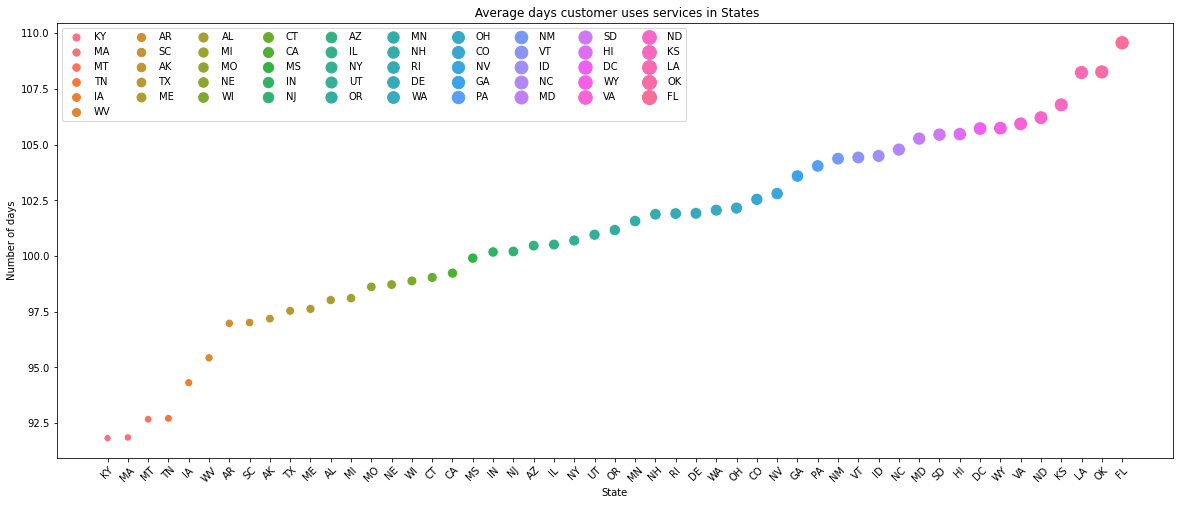

In [37]:
# Sort the dataframe values by Account length and Plotting the Graph average number of days customer use service before Churn

data_mean.sort_values(by='Account length',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))

sns.scatterplot(x='State',y='Account length',data=plot_data,hue='State',size='State',sizes=(200,50))

plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' Average days customer uses services in States')
plt.ylabel("Number of days")
plt.tick_params(axis='x',rotation=45)
plt.legend(ncol=10)

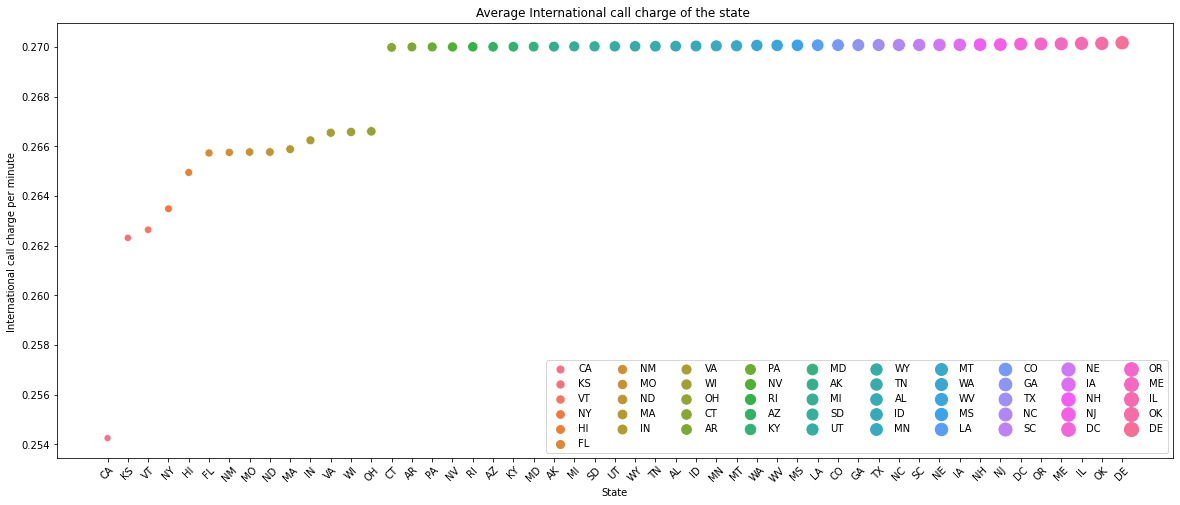

In [38]:
#Plot of Average International call charge of the state 

data_mean.sort_values(by='intl charge per minute',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='intl charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f'Average International call charge of the state ')
plt.ylabel("International call charge per minute ")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

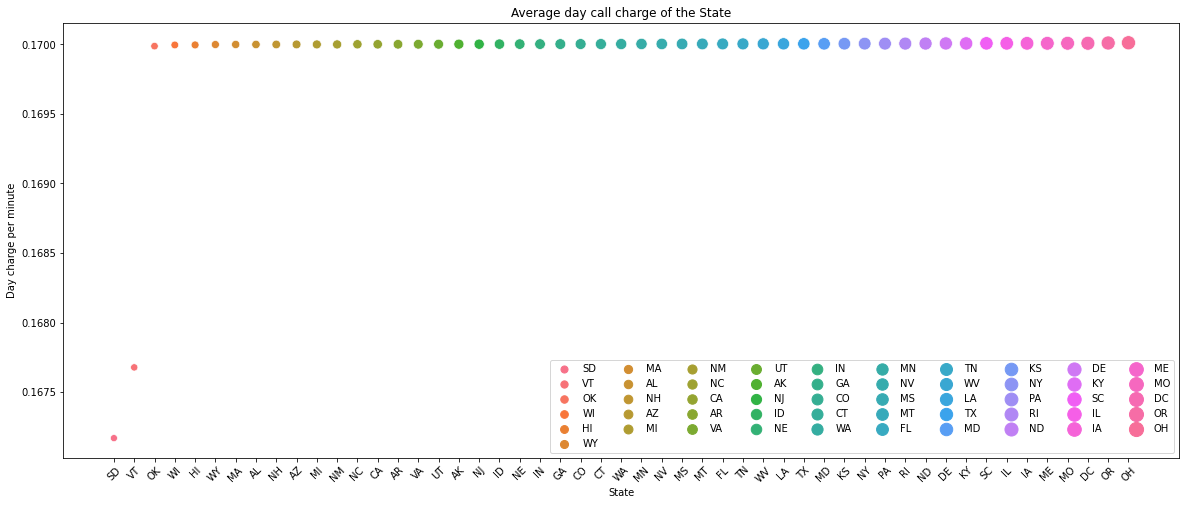

In [39]:
# Plot average day charge per minute for the state 

data_mean.sort_values(by='day charge per minute',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='day charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f'Average day call charge of the State')
plt.ylabel("Day charge per minute")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

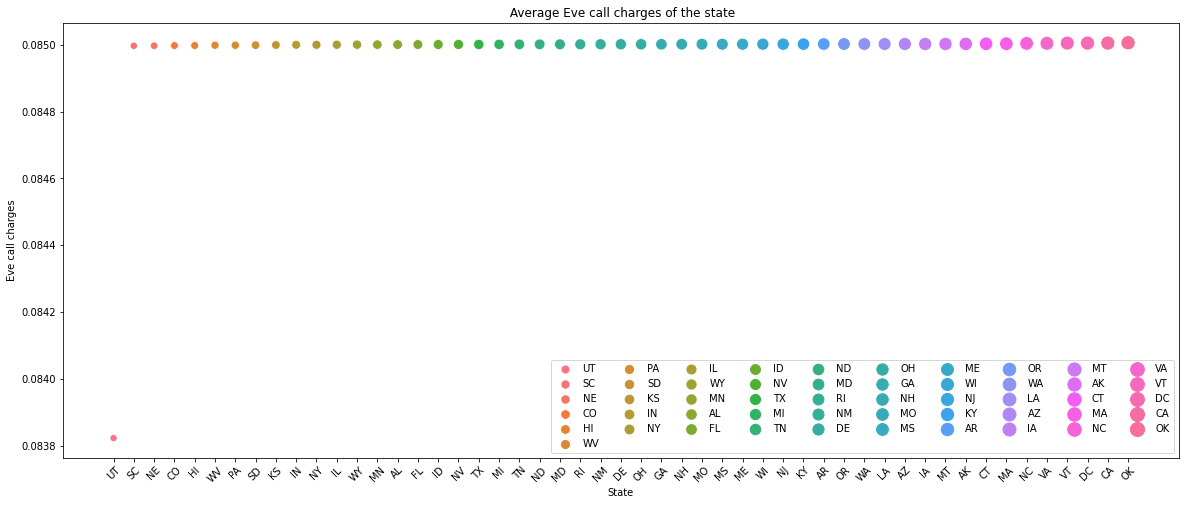

In [40]:
# Plot average Eve charge per minute for the state 

data_mean.sort_values(by='eve charge per minute',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='eve charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' Average Eve call charges of the state')
plt.ylabel("Eve call charges")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

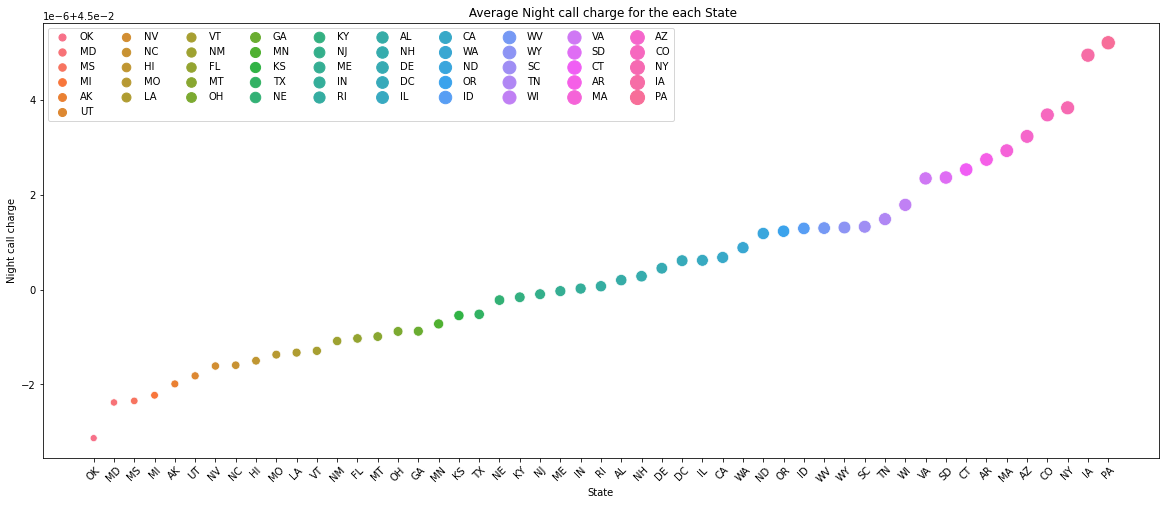

In [41]:
# Average Night charge for the each State

data_mean.sort_values(by='night charge per minute',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='night charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' Average Night call charge for the each State')
plt.ylabel("Night call charge")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

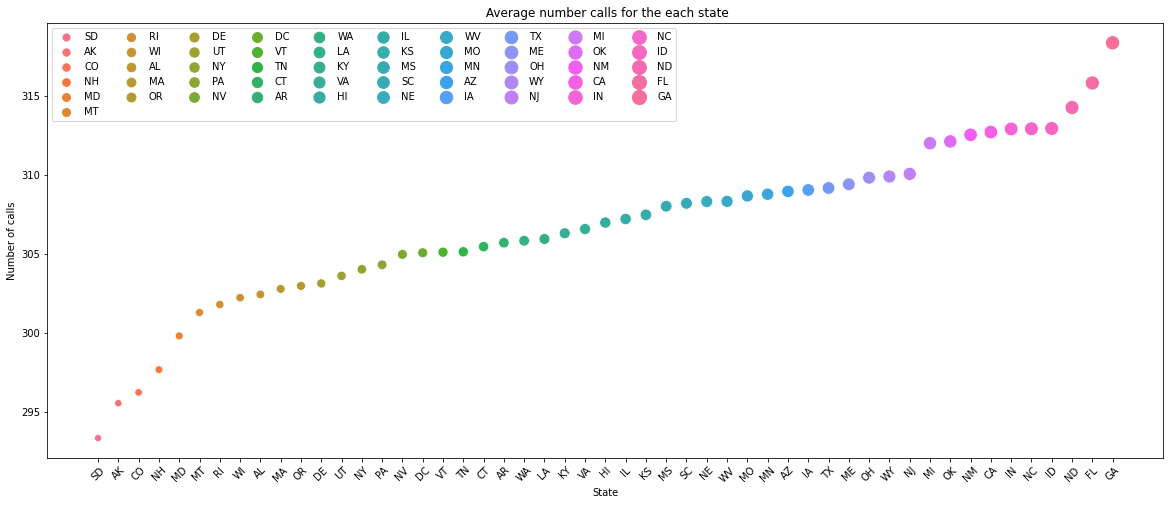

In [42]:
#Average number of calls for the State

data_mean.sort_values(by='number of calls',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='number of calls',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' Average number calls for the each state')
plt.ylabel("Number of calls")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

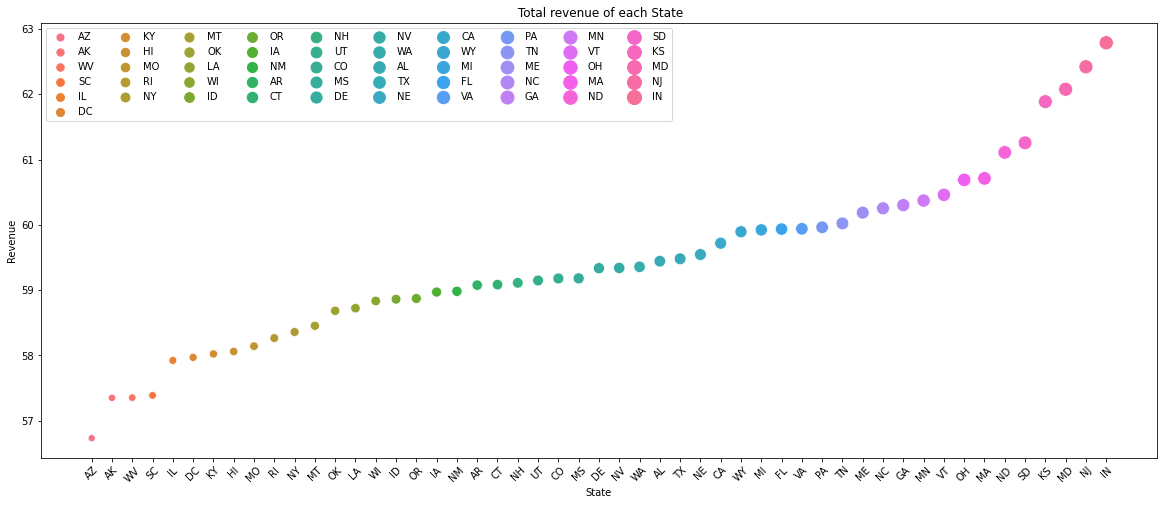

In [43]:
# Total Revenue Earn by the each state 

data_mean.sort_values(by='Total revenue',inplace=True)
plot_data=data_mean

plt.figure(figsize=(20,8))
sns.scatterplot(x='State',y='Total revenue',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' Total revenue of each State')
plt.ylabel("Revenue")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

In [44]:
# Complaint percent for the Services

df['complaint percent']=df.apply(lambda x: round((x['Customer service calls']/x['number of calls']*100),2),axis=1)

In [45]:
# data extraction when the customer has churn the service and sort the data by States

da=df[df['Churn']==True][['State','Churn','Customer service calls','number of calls','complaint percent','Total revenue','Total intl charge','Total night charge','Total day charge','Total eve charge']]
da.sort_values(by=['State'])

,State,Churn,Customer service calls,number of calls,complaint percent,Total revenue,Total intl charge,Total night charge,Total day charge,Total eve charge
0,AK,True,5,309,1.62,31.05,3.21,6.16,9.89,11.79
1,AK,True,4,277,1.44,54.22,2.13,7.15,29.38,15.56
30,AK,True,1,281,0.36,68.62,3.05,8.64,42.28,14.65
53,AL,True,5,300,1.67,52.07,3.70,7.83,21.64,18.90
54,AL,True,1,309,0.32,67.42,3.86,9.17,32.62,21.77
...,...,...,...,...,...,...,...,...,...,...
3289,WY,True,0,256,0.00,49.76,2.78,6.30,28.46,12.22
3299,WY,True,5,317,1.58,74.69,2.21,12.09,41.17,19.22
3304,WY,True,3,267,1.12,76.40,3.11,9.97,46.10,17.22
3306,WY,True,5,334,1.50,56.14,2.62,9.18,25.67,18.67


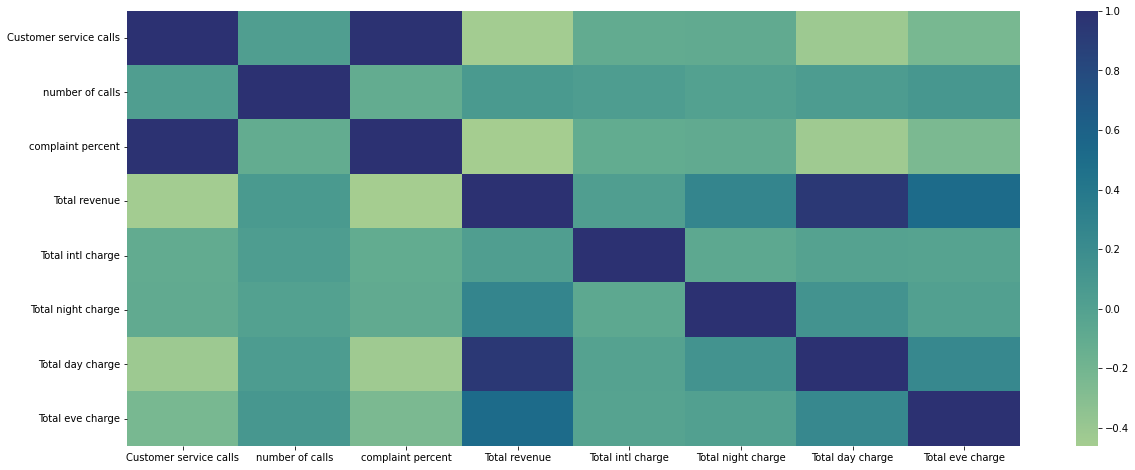

In [46]:
# Relation between column label

heat_data=df[df['Churn']==True][['Customer service calls','number of calls','complaint percent','Total revenue','Total intl charge','Total night charge','Total day charge','Total eve charge']]
heatmap_corr=heat_data.corr()
sns.heatmap(heatmap_corr,cmap="crest")



In [47]:
# Condition When Certain Condition in the Dataframe 

cond1=(da['complaint percent']>1)
cond2=(da['Total intl charge']>df['Total intl charge'].agg('mean'))
cond3=(da['Total revenue']>1.2*df['Total revenue'].agg('mean'))
cond4=(da['number of calls']<df['number of calls'].agg('mean'))
cond5=(da['Total day charge']>1.2*df['Total day charge'].agg('mean'))
cond6=(da['Total eve charge']>1.2*df['Total eve charge'].agg('mean'))
cond7=(da['Total night charge']>1.2*df['Total night charge'].agg('mean'))

In [48]:
#Count of the Churn when Condition 1 is meet:

da[cond1]['Churn'].count()

159

In [49]:
#Count of the Churn when Condition 2 is meet:

da[cond2]['Churn'].count()

269

In [50]:
#Count of the Churn when Condition 3 is meet:

da[cond3]['Churn'].count()

216

In [51]:
#Count of the Churn when Condition 4 is meet:

da[cond4]['Churn'].count()

233

In [52]:
#Count of the Churn when Condition 5 is meet:

da[cond5]['Churn'].count()

246

In [53]:
#Count of the Churn when Condition 6 is meet:

da[cond6]['Churn'].count()

143

In [54]:
#Count of the Churn when Condition 7 is meet:

da[cond7]['Churn'].count()

116

In [55]:
#Count of the Churn when Condition 1,2,3 and 4 is meet:

da[cond1 & cond2 & cond3 & cond4 ]['Churn'].count()

9